# Exploratory Data Analysis

## Loading Data

In [1]:
import pandas as pd

In [2]:
# Load prepared dataset
data = pd.read_pickle("lenta-ru-news-prepared.pkl")

In [3]:
# Preview data
data.head()

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,бои у сопоцкина и друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,министерство народного просвещения в виду про...,Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,штабс капитан п н нестеров на днях увидев в...,Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,фотограф корреспондент рассказывает случай ...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,лица приехавшие в варшаву из люблина передаю...,Библиотека,Первая мировая,1914/09/18


## Partitioning Dataset By Periods

In [4]:
# Create lambda function that extracts year from date
get_year = lambda x: int(x.split('/')[0])

In [5]:
# Add a column with year
data['year'] = data['date'].apply(get_year)

In [6]:
# Preview data
data.head()

,url,title,text,topic,tags,date,year
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,бои у сопоцкина и друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16,1914
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,министерство народного просвещения в виду про...,Библиотека,Первая мировая,1914/09/16,1914
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,штабс капитан п н нестеров на днях увидев в...,Библиотека,Первая мировая,1914/09/17,1914
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,фотограф корреспондент рассказывает случай ...,Библиотека,Первая мировая,1914/09/17,1914
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,лица приехавшие в варшаву из люблина передаю...,Библиотека,Первая мировая,1914/09/18,1914


In [7]:
# Partition dataset into smaller ones with approximately same size by periods
data_1914_2005 = data[data['year'] <= 2005]
data_2006_2009 = data[(data['year'] >= 2006) & (data['year'] <= 2009)]
data_2010_2013 = data[(data['year'] >= 2010) & (data['year'] <= 2013)]
data_2014_2016 = data[(data['year'] >= 2014) & (data['year'] <= 2016)]
data_2017_2019 = data[(data['year'] >= 2017)]

In [8]:
# Check size of resulting datasets
len(data_1914_2005), len(data_2006_2009), len(data_2010_2013), len(data_2014_2016), len(data_2017_2019)

(140076, 173725, 178753, 145949, 162472)

In [9]:
# Make sure all rows were included
len(data) == len(data_1914_2005) + len(data_2006_2009) + len(data_2010_2013) + len(data_2014_2016) + len(data_2017_2019)

True

## Extracting Features

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from tqdm import tqdm
import numpy as np

In [54]:
# Create russian stopwords list
stop_words = stopwords.words("russian")
stop_words.extend(['это', 'который', 'также', 'свой', 'весь'])

In [48]:
# Initialize Count Vectorizer
cv = CountVectorizer(stop_words=stop_words, max_features=100)

In [49]:
# Create Document-term Matrix for each dataset

In [56]:
cv = CountVectorizer(stop_words=stop_words, max_features=100)
data_1914_2005_cv = cv.fit_transform(data_1914_2005['text'])
data_1914_2005_dtm = pd.DataFrame(data_1914_2005_cv.toarray(), columns=cv.get_feature_names())
data_1914_2005_dtm_transposed = data_1914_2005_dtm.transpose()
data_1914_2005_dtm.head()

,агентство,аль,безопасности,будут,владимир,власти,времени,время,вторник,газета,...,тысяч,удалось,участие,ходе,частности,человек,человека,четверг,числе,является
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
cv = CountVectorizer(stop_words=stop_words, max_features=100)
data_2006_2009_cv = cv.fit_transform(data_2006_2009['text'])
data_2006_2009_dtm = pd.DataFrame(data_2006_2009_cv.toarray(), columns=cv.get_feature_names())
data_2006_2009_dtm_transposed = data_2006_2009_dtm.transpose()
data_2006_2009_dtm.head()

,августа,агентство,апреля,будут,власти,времени,время,газета,глава,год,...,тысяч,удалось,украины,ходе,частности,часть,человек,числе,является,января
0,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,1,1,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [58]:
cv = CountVectorizer(stop_words=stop_words, max_features=100)
data_2010_2013_cv = cv.fit_transform(data_2010_2013['text'])
data_2010_2013_dtm = pd.DataFrame(data_2010_2013_cv.toarray(), columns=cv.get_feature_names())
data_2010_2013_dtm_transposed = data_2010_2013_dtm.transpose()
data_2010_2013_dtm.head()

,августа,агентство,апреля,будут,власти,время,газета,глава,год,года,...,тысячи,удалось,февраля,ходе,частности,часть,человек,числе,является,января
0,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,1,2,1,0,0


In [59]:
cv = CountVectorizer(stop_words=stop_words, max_features=100)
data_2014_2016_cv = cv.fit_transform(data_2014_2016['text'])
data_2014_2016_dtm = pd.DataFrame(data_2014_2016_cv.toarray(), columns=cv.get_feature_names())
data_2014_2016_dtm_transposed = data_2014_2016_dtm.transpose()
data_2014_2016_dtm.head()

,августа,апреля,безопасности,будут,владимир,власти,время,глава,говорится,год,...,тысяч,тысячи,украины,февраля,ходе,частности,человек,числе,является,января
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
3,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [60]:
data_2017_2019_cv = cv.fit_transform(data_2017_2019['text'])
data_2017_2019_dtm = pd.DataFrame(data_2017_2019_cv.toarray(), columns=cv.get_feature_names())
data_2017_2019_dtm_transposed = data_2017_2019_dtm.transpose()
data_2017_2019_dtm.head()

,августа,апреля,безопасности,будут,видео,владимир,власти,время,глава,говорится,...,тысяч,тысячи,украины,февраля,ходе,частности,человек,числе,является,января
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,3,0,0,0
3,0,0,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,2,1,0,0


In [61]:
# Filter words that were used more than once in each article

In [65]:
frequent_words_1914_2005 = {}
for col in tqdm(data_1914_2005_dtm_transposed.columns):
    freq = data_1914_2005_dtm_transposed.loc[data_1914_2005_dtm_transposed[col] > 1, col]
    top = freq.sort_values(ascending=False)
    frequent_words_1914_2005[col] = list(zip(top.index, top.values))

100%|████████████████████████████████████████████████████████████████████████| 140076/140076 [01:57<00:00, 1187.56it/s]


In [66]:
frequent_words_2006_2009 = {}
for col in tqdm(data_2006_2009_dtm_transposed.columns):
    freq = data_2006_2009_dtm_transposed.loc[data_2006_2009_dtm_transposed[col] > 1, col]
    top = freq.sort_values(ascending=False)
    frequent_words_2006_2009[col] = list(zip(top.index, top.values))

100%|████████████████████████████████████████████████████████████████████████| 173725/173725 [02:42<00:00, 1066.56it/s]


In [67]:
frequent_words_2010_2013 = {}
for col in tqdm(data_2010_2013_dtm_transposed.columns):
    freq = data_2010_2013_dtm_transposed.loc[data_2010_2013_dtm_transposed[col] > 1, col]
    top = freq.sort_values(ascending=False)
    frequent_words_2010_2013[col] = list(zip(top.index, top.values))

100%|████████████████████████████████████████████████████████████████████████| 178753/178753 [02:50<00:00, 1048.79it/s]


In [68]:
frequent_words_2014_2016 = {}
for col in tqdm(data_2014_2016_dtm_transposed.columns):
    freq = data_2014_2016_dtm_transposed.loc[data_2014_2016_dtm_transposed[col] > 1, col]
    top = freq.sort_values(ascending=False)
    frequent_words_2014_2016[col] = list(zip(top.index, top.values))

100%|████████████████████████████████████████████████████████████████████████| 145949/145949 [02:20<00:00, 1041.95it/s]


In [69]:
frequent_words_2017_2019 = {}
for col in tqdm(data_2017_2019_dtm_transposed.columns):
    freq = data_2017_2019_dtm_transposed.loc[data_2017_2019_dtm_transposed[col] > 1, col]
    top = freq.sort_values(ascending=False)
    frequent_words_2017_2019[col] = list(zip(top.index, top.values))

100%|████████████████████████████████████████████████████████████████████████| 162472/162472 [02:38<00:00, 1022.08it/s]


In [70]:
# Combine frequent words into list

In [72]:
words_1914_2005 = []
for index in data_1914_2005_dtm_transposed.columns:
    top = [word for (word, count) in frequent_words_1914_2005[index]]
    for t in top:
        words_1914_2005.append(t)

In [73]:
words_2006_2009 = []
for index in data_2006_2009_dtm_transposed.columns:
    top = [word for (word, count) in frequent_words_2006_2009[index]]
    for t in top:
        words_2006_2009.append(t)

In [74]:
words_2010_2013 = []
for index in data_2010_2013_dtm_transposed.columns:
    top = [word for (word, count) in frequent_words_2010_2013[index]]
    for t in top:
        words_2010_2013.append(t)

In [75]:
words_2014_2016 = []
for index in data_2014_2016_dtm_transposed.columns:
    top = [word for (word, count) in frequent_words_2014_2016[index]]
    for t in top:
        words_2014_2016.append(t)

In [76]:
words_2017_2019 = []
for index in data_2017_2019_dtm_transposed.columns:
    top = [word for (word, count) in frequent_words_2017_2019[index]]
    for t in top:
        words_2017_2019.append(t)

## Visualization

In [77]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [78]:
# Generate word clouds

In [104]:
wordcloud_1914_2005 = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=0,
                               ).generate(' '.join(words_1914_2005))
wordcloud_2006_2009 = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=0
                               ).generate(' '.join(words_2006_2009))
wordcloud_2010_2013 = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=0
                               ).generate(' '.join(words_2010_2013))
wordcloud_2014_2016 = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=0
                               ).generate(' '.join(words_2014_2016))
wordcloud_2017_2019 = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=0
                               ).generate(' '.join(words_2017_2019))

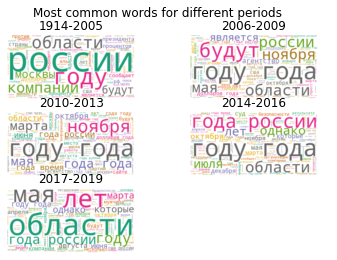

In [105]:
fig, axs = plt.subplots(3, 2)
fig.suptitle("Most common words for different periods")

axs[0, 0].imshow(wordcloud_1914_2005, interpolation="bilinear")
axs[0, 0].set_title('1914-2005')

axs[0, 1].imshow(wordcloud_2006_2009, interpolation="bilinear")
axs[0, 1].set_title('2006-2009')

axs[1, 0].imshow(wordcloud_2010_2013, interpolation="bilinear")
axs[1, 0].set_title('2010-2013')

axs[1, 1].imshow(wordcloud_2014_2016, interpolation="bilinear")
axs[1, 1].set_title('2014-2016')

axs[2, 0].imshow(wordcloud_2017_2019, interpolation="bilinear")
axs[2, 0].set_title('2017-2019')

for ax in axs.flat:
    ax.axis("off")

In [109]:
"""From the given plot we can see what was the most common words in articles of different periods"""

'From the given plot we can see what was the most common words in articles of different periods'